In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/train/pizza')))
print(len(os.listdir('/content/drive/MyDrive/train/icecream')))
print(len(os.listdir('/content/drive/MyDrive/test/pizza')))
print(len(os.listdir('/content/drive/MyDrive/test/icecream')))

327
391
47
59


In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (cats vs. dogs)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 575 images belonging to 2 classes.
Found 143 images belonging to 2 classes.


In [6]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [7]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

In [8]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [9]:
history = model.fit(train_data, epochs=30, validation_data=validation_data)

Epoch 1/30
18/18 [==============================] - 211s 11s/step - loss: 0.8153 - accuracy: 0.6835 - val_loss: 0.4099 - val_accuracy: 0.8252
Epoch 2/30
18/18 [==============================] - 90s 5s/step - loss: 0.4034 - accuracy: 0.8278 - val_loss: 0.3635 - val_accuracy: 0.8392
Epoch 3/30
18/18 [==============================] - 87s 5s/step - loss: 0.3235 - accuracy: 0.8557 - val_loss: 0.2958 - val_accuracy: 0.8881
Epoch 4/30
18/18 [==============================] - 89s 5s/step - loss: 0.3002 - accuracy: 0.8852 - val_loss: 0.3256 - val_accuracy: 0.8601
Epoch 5/30
18/18 [==============================] - 90s 5s/step - loss: 0.1996 - accuracy: 0.9096 - val_loss: 0.3541 - val_accuracy: 0.8322
Epoch 6/30
18/18 [==============================] - 94s 5s/step - loss: 0.1393 - accuracy: 0.9461 - val_loss: 0.3635 - val_accuracy: 0.8951
Epoch 7/30
18/18 [==============================] - 86s 5s/step - loss: 0.0971 - accuracy: 0.9513 - val_loss: 0.3616 - val_accuracy: 0.8741
Epoch 8/30
18/18 [

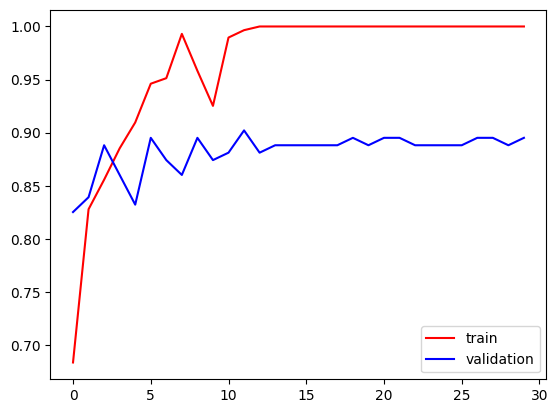

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

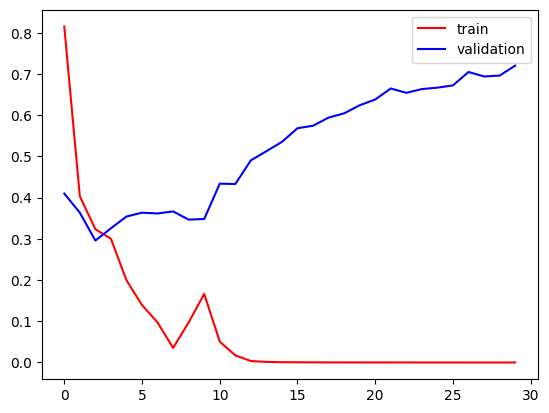

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 106 images belonging to 2 classes.


In [13]:
#predict the test data
predictions = model.predict(test_data)
print(predictions)

4/4 [==============================] - 22s 7s/step
[[9.99999940e-01]
 [1.00000000e+00]
 [2.30845581e-06]
 [4.00048863e-13]
 [6.32198388e-03]
 [1.04838250e-06]
 [2.23637660e-08]
 [9.94974971e-01]
 [9.95508075e-01]
 [3.46700472e-06]
 [2.06657536e-08]
 [9.99997318e-01]
 [8.85787085e-06]
 [2.30845581e-06]
 [2.24390515e-08]
 [1.88377574e-02]
 [2.21921326e-09]
 [2.79191765e-04]
 [1.00000000e+00]
 [1.00000000e+00]
 [3.44124771e-07]
 [1.00000000e+00]
 [5.10504723e-01]
 [3.88646049e-06]
 [4.16217297e-01]
 [1.83129889e-09]
 [1.92163698e-05]
 [1.75291129e-10]
 [9.99999702e-01]
 [9.28706001e-08]
 [1.00000000e+00]
 [9.97189760e-01]
 [2.15791375e-03]
 [1.00332494e-04]
 [1.42692585e-07]
 [2.02465453e-04]
 [6.55378471e-08]
 [1.32745981e-09]
 [9.96653974e-01]
 [9.89186108e-01]
 [9.99999523e-01]
 [9.99999642e-01]
 [1.41229387e-03]
 [9.98921156e-01]
 [1.82148199e-07]
 [9.89845514e-01]
 [1.00000000e+00]
 [1.77797304e-07]
 [1.00000000e+00]
 [1.34789370e-05]
 [1.00000000e+00]
 [1.00000000e+00]
 [9.99999881e

In [14]:
len(predictions)

106

In [15]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[32 27]
 [28 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54        59
           1       0.41      0.40      0.41        47

    accuracy                           0.48       106
   macro avg       0.47      0.47      0.47       106
weighted avg       0.48      0.48      0.48       106

